In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_curve
import itertools
import yaml
import os
import numpy as np
from statistics import mean 


In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [5]:
path = 'train_random_forest_train_window_38_train_period_1_trading_strategy_strategies.bband_strategy'
orders = pd.read_csv(os.path.join('./data', path, 'orders.csv'))
wallet = pd.read_csv(os.path.join('./data', path, 'wallet.csv'))
true_values = pd.read_csv(os.path.join('./data', path, 'stock_true_values.csv'))
predictions = pd.read_csv(os.path.join('./data', path, 'stock_predictions.csv'))
prices = pd.read_csv(os.path.join('./data', 'ypf.csv'))

In [6]:
orders

,id,ticker,type,open_date,close_date,open_price,close_price,profit
0,b8183d3f-00ad-11ef-99da-8730114b838b,LOMA,buy,2020-05-04,2020-05-11,2.864790,3.283819,0.419029
1,b81dffd3-00ad-11ef-8a27-8730114b838b,EDN,buy,2020-05-05,2020-05-06,2.900000,2.950000,0.050000
2,b9b1c153-00ad-11ef-8361-8730114b838b,LOMA,buy,2020-05-14,2020-05-15,3.198303,3.326578,0.128275
3,bb429854-00ad-11ef-a000-8730114b838b,LOMA,buy,2020-05-27,2020-05-28,3.925191,3.993604,0.068413
4,bf381041-00ad-11ef-a817-8730114b838b,YPF,buy,2020-06-24,2020-06-25,5.460000,5.770000,0.310000
...,...,...,...,...,...,...,...,...
137,6fd60c74-00ae-11ef-bbd9-8730114b838b,LOMA,buy,2024-01-16,2024-01-18,6.510000,6.720000,0.210000
138,7032e668-00ae-11ef-a3fc-8730114b838b,EDN,buy,2024-01-17,2024-01-18,17.610001,18.850000,1.240000
139,7039af6b-00ae-11ef-b5f0-8730114b838b,YPF,buy,2024-01-18,2024-01-19,15.200000,15.630000,0.430000
140,734f095d-00ae-11ef-94bf-8730114b838b,LOMA,buy,2024-02-08,2024-02-14,6.220000,6.390000,0.170000


In [6]:
with open('configs/project_config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

tickers = config["tickers"] 
tickers

predictions = predictions.sort_values(by='fecha')
true_values = true_values.sort_values(by='fecha')


# renombro las columnas
column_names = {}
for column in predictions.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_proba'

predictions = predictions.rename(columns=column_names)

column_names = {}
for column in true_values.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_true'

true_values = true_values.rename(columns=column_names)
performance = pd.concat(
    [
        predictions,
        true_values
    ], axis=1, join="inner"
)

auc_list = []
for ticker in tickers:
    y_true = performance[performance[f'{ticker}_true'].notna()][f'{ticker}_true']
    y_pred = performance[performance[f'{ticker}_proba'].notna()][f'{ticker}_proba']
    
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    
    auc_list.append(auc_score)
    print(f'{ticker}: {auc_score}')

print(mean(auc_list))

YPF: 0.7960858585858588
BBAR: 0.7739035087719298
BMA: 0.7886307957535613
CEPU: 0.7591532699267738
EDN: 0.8068309595202399
TEO: 0.7713178294573643
LOMA: 0.8091422466422465
0.7864377812368535


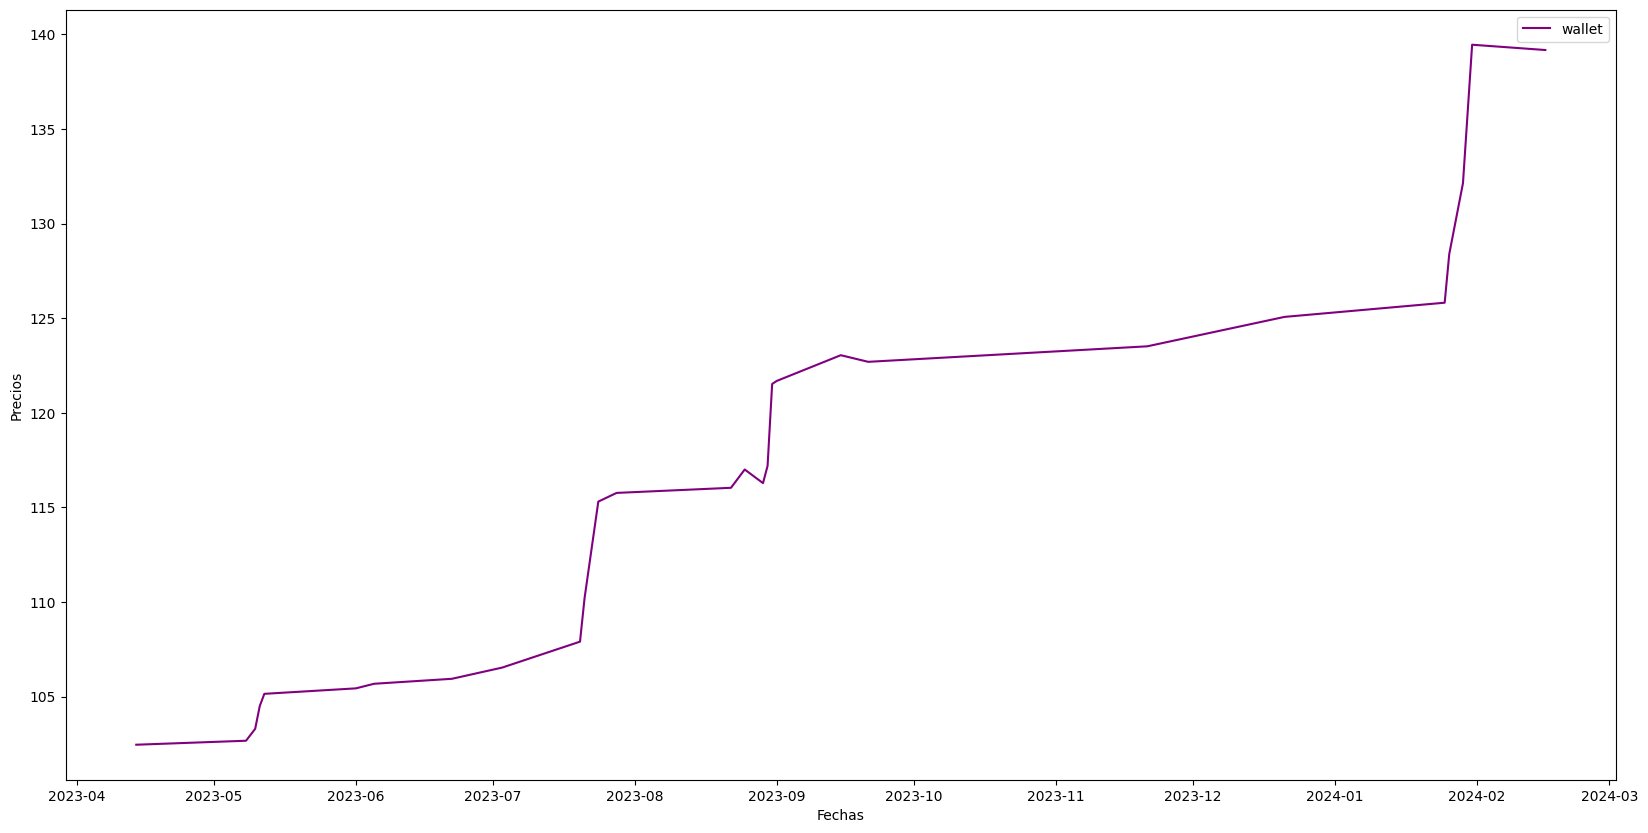

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [9]:
orders

,id,ticker,type,open_date,close_date,open_price,close_price,profit
0,13a09356-eb09-11ee-8deb-a5067311f39d,BMA,buy,2023-04-10,2023-04-14,16.061762,18.514282,2.452520
1,15099a11-eb09-11ee-a21e-a5067311f39d,YPF,buy,2023-04-26,2023-05-10,11.020000,11.650000,0.629999
2,1542207e-eb09-11ee-9ca4-a5067311f39d,LOMA,buy,2023-04-28,2023-05-08,5.371694,5.582348,0.210655
3,15468cb7-eb09-11ee-9e96-a5067311f39d,BMA,buy,2023-05-01,2023-05-11,15.357223,16.561186,1.203963
4,15796c96-eb09-11ee-ae6b-a5067311f39d,CEPU,buy,2023-05-02,2023-05-12,5.174697,5.458729,0.284032
5,1579d0c9-eb09-11ee-9ce6-a5067311f39d,TEO,buy,2023-05-02,2023-05-12,4.776937,5.138537,0.361601
6,16cb2ba1-eb09-11ee-986c-a5067311f39d,CEPU,buy,2023-05-18,2023-08-25,5.361093,6.328575,0.967482
7,16cb786a-eb09-11ee-a606-a5067311f39d,YPF,buy,2023-05-18,2023-07-24,10.880000,15.630000,4.750000
8,1705fb86-eb09-11ee-bd79-a5067311f39d,BBAR,buy,2023-05-22,2023-06-01,3.944897,4.234003,0.289106
9,1778e443-eb09-11ee-8f9d-a5067311f39d,LOMA,buy,2023-05-26,2023-06-05,5.720801,5.964240,0.243438


# Grafico de velas

In [4]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
#                 open=prices['Open'],
#                 high=prices['High'],
#                 low=prices['Low'],
#                 close=prices['Close'])])

# fig.update_layout(
#     title=f"{config['ticker']}",
#     yaxis_title=f"{config['ticker']} Stock"
# )

# fig.show()

# Estrategia

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['fecha'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


KeyError: 'buy'

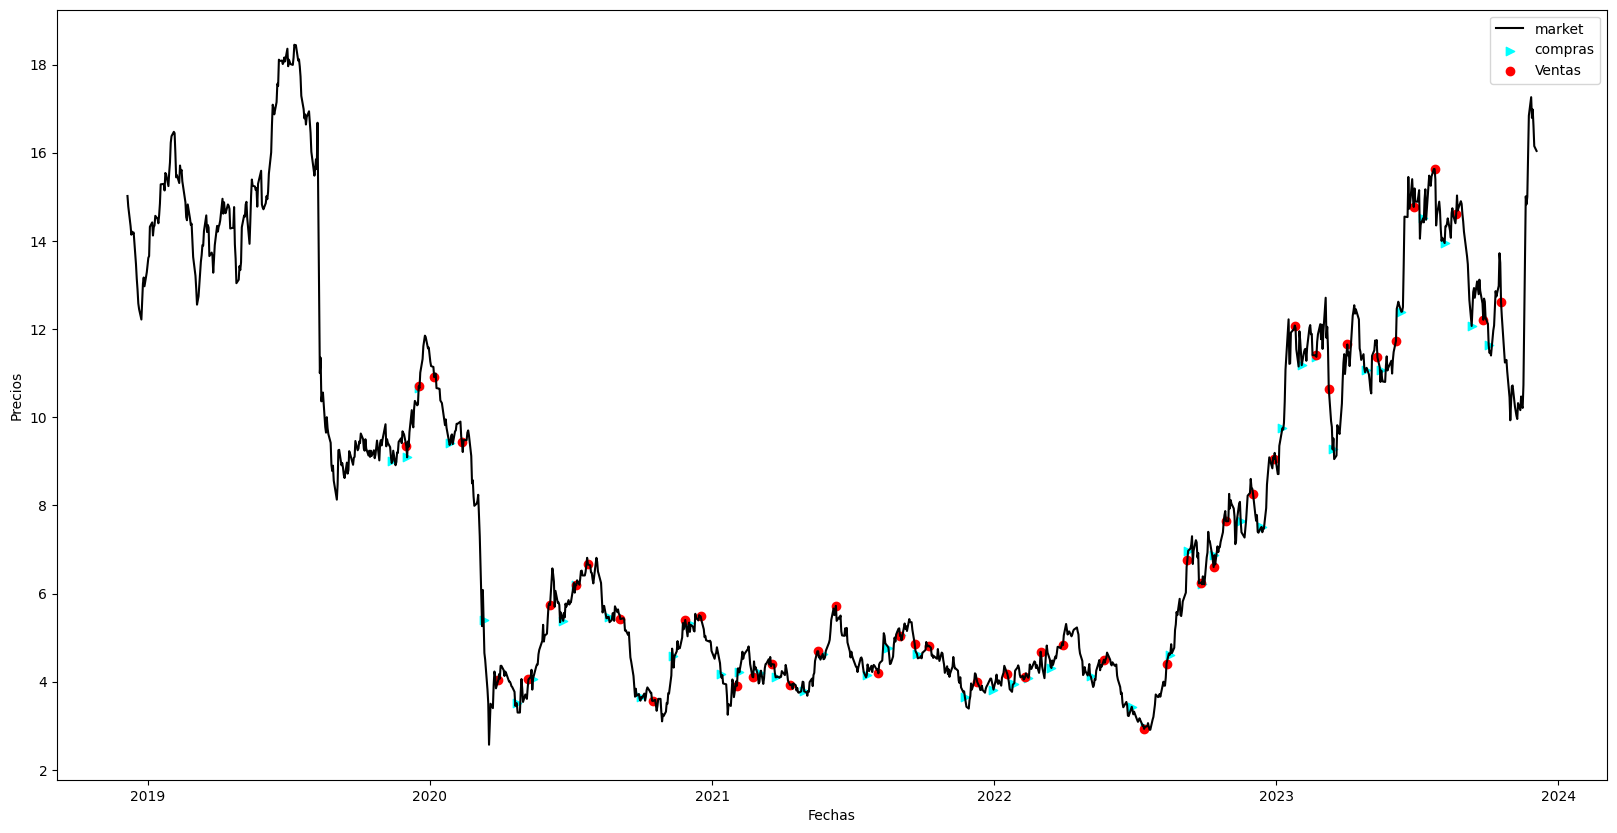

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


Area bajo la curva:  5166.779962420464


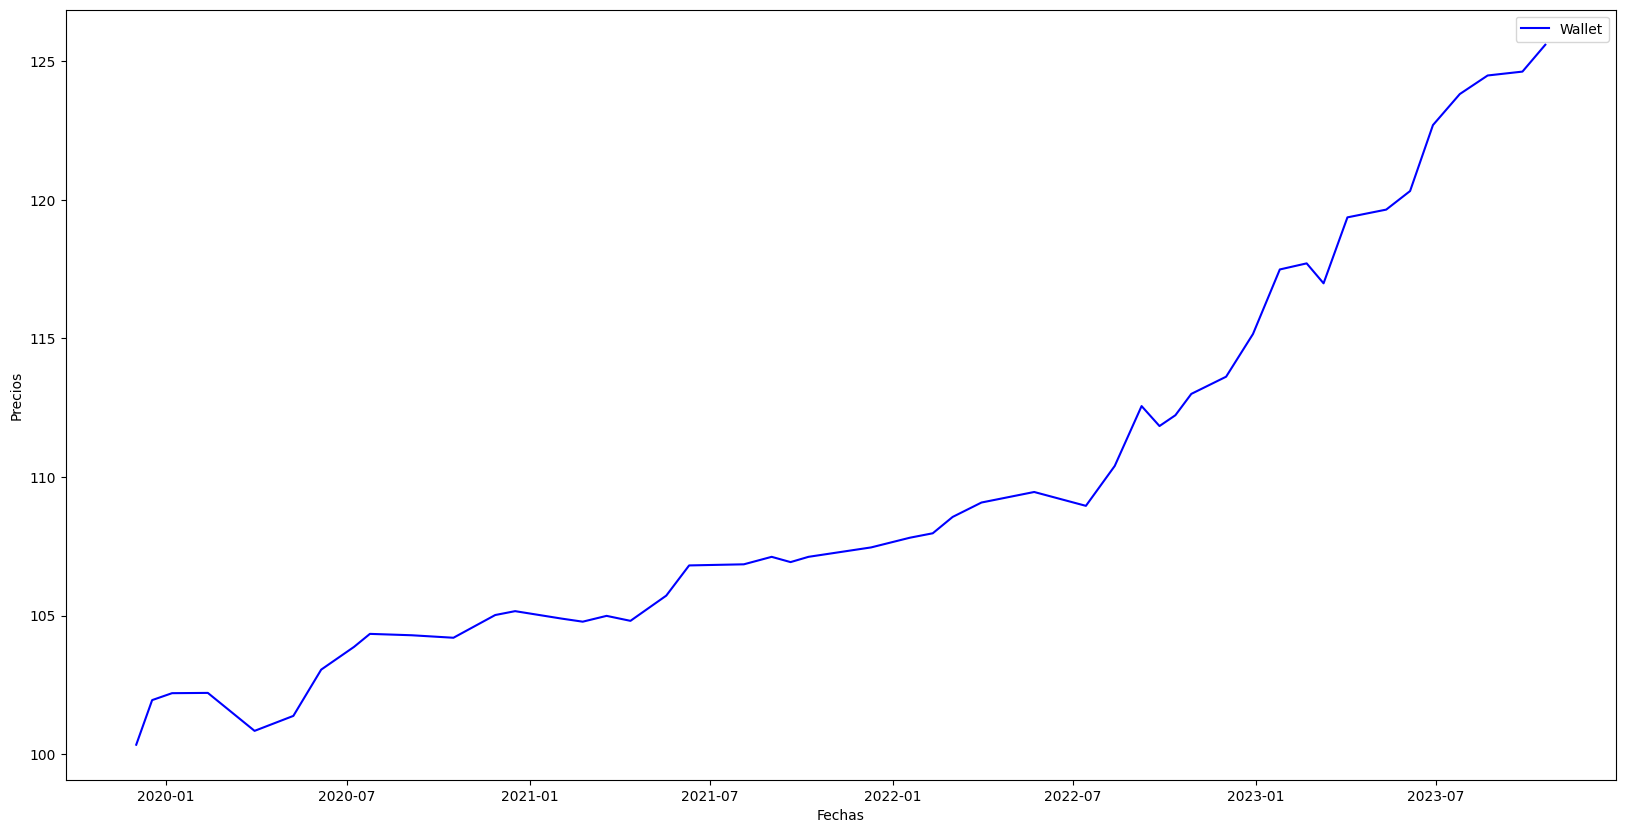

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [70]:
predictions.sort_values(by='fecha')

,fecha,YPF,BBAR
0,2020-02-10,0.030000,0.020000
1,2020-02-11,0.155000,0.046667
2,2020-02-12,0.092857,0.000000
3,2020-02-13,0.270857,0.502333
4,2020-02-14,0.013333,0.421667
...,...,...,...
700,2023-02-23,0.720000,0.916667
701,2023-02-24,0.453333,0.640667
702,2023-02-27,0.202667,0.283333
703,2023-02-28,0.460667,0.303333


In [71]:
true_values.sort_values(by='fecha')

,fecha,YPF,BBAR
0,2020-02-10,0.0,0.0
1,2020-02-11,0.0,0.0
2,2020-02-12,0.0,0.0
3,2020-02-13,0.0,0.0
4,2020-02-14,0.0,0.0
...,...,...,...
700,2023-02-23,0.0,1.0
701,2023-02-24,0.0,0.0
702,2023-02-27,0.0,0.0
703,2023-02-28,0.0,0.0


In [73]:
accuracy_score(predictions[predictions['YPF'].notna()].YPF, true_values[true_values['YPF'].notna()].YPF)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [44]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

KeyError: 'y_pred'

0.8536585365853658


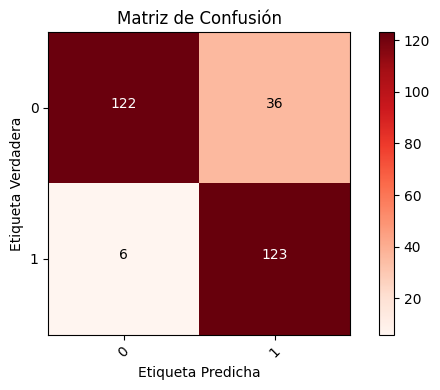

In [10]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

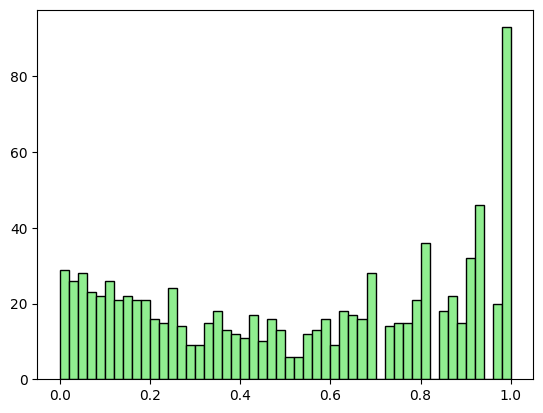

In [11]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys = buys.rename(columns={''})

In [62]:
operations = pd.concat([buys[buys['YPF'].notna()], sells[sells['YPF'].notna()]], axis=1, join="inner")[['fecha','YPF']]
operations

,fecha,fecha,YPF,YPF
0,2020-04-27,2020-05-12,3.30,4.27
1,2020-05-28,2020-06-12,4.91,6.06
2,2020-06-23,2020-07-09,5.56,6.19
3,2020-07-14,2020-07-29,6.33,6.47
4,2020-11-18,2020-12-04,4.74,5.29
5,2021-02-03,2021-02-19,4.30,4.40
6,2021-03-08,2021-03-23,3.95,4.20
7,2021-03-26,2021-04-13,4.12,3.93
8,2021-05-06,2021-05-24,3.77,4.63
9,2021-05-25,2021-06-11,4.51,5.38


In [29]:
operations['positive'] = np.where(operations['buy']>operations['sell'], 0, 1)
operations['Profit'] = operations['sell'] - operations['buy'] 
operations['positive'].value_counts()

KeyError: 'buy'